In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
def in_semicircle(x, y, cx, cy):
  if cx != 0:
    return (x - cx)**2 + (y - cy)**2 <= 1
  else:
    return (x - cx)**2 + (y - cy)**2 <=1

In [ ]:
def draw_semicircle(ax, center, radius, orientation, color):
  theta = np.linspace(0, np.pi, 100)
  if orientation == 'left':
    x = center[0] + radius * np.sin(theta)
    y = center[1] + radius * np.cos(theta)
  elif orientation == 'up':
    x = center[0] - radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
  elif orientation == 'right':
    x = center[0] + radius * (-np.sin(theta))
    y = center[1] - radius * np.cos(theta)
  elif orientation == 'down':
    x = center[0] + radius * np.cos(theta)
    y = center[1] - radius * np.sin(theta)
  ax.fill(x, y, color=color, alpha=0.3)

[[ 0.68683479 -0.15941787]
 [ 0.8414527  -0.98785825]
 [ 0.5955929  -0.78090236]
 ...
 [-0.72129984 -0.30544035]
 [ 0.08827135 -0.54304569]
 [-0.17338574 -0.0263462 ]]
[0. 0. 2. ... 0. 0. 4.]


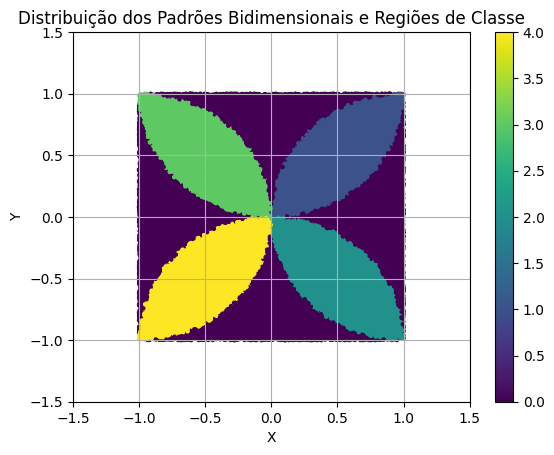

In [ ]:
n_points = 10000

points = np.random.uniform(-1,1,(n_points * 5, 2))
labels = np.zeros((n_points * 5,))

for i, (x,y) in enumerate(points):
  if in_semicircle(x, y, 1, 0) and in_semicircle(x, y, -1, 0) and in_semicircle(x,y,0,-1):
    labels[i] = 0
  elif in_semicircle(x, y, 1, 0) and in_semicircle(x,y,0,1):
    labels[i] = 1
  elif in_semicircle(x,y,1,0) and in_semicircle(x,y,0,-1):
    labels[i] = 2
  elif in_semicircle(x,y,0,1) and in_semicircle(x,y,-1,0):
    labels[i] = 3
  elif in_semicircle(x,y,0,-1) and in_semicircle(x,y,-1,0):
    labels[i] = 4

print(points)
print(labels)

ax = plt.gca()
draw_semicircle(ax,(1,0),1,'right', 'red')
draw_semicircle(ax,(-1,0),1,'left', 'blue')
draw_semicircle(ax,(0,1),1,'down', 'green')
draw_semicircle(ax,(0,-1),1,'up', 'purple')

plt.scatter(points[:,0],points[:,1],c=labels,cmap='viridis', s=5)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribuição dos Padrões Bidimensionais e Regiões de Classe')
plt.grid(True)
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(points, labels, test_size=0.2,
                                                  random_state=42, stratify=labels)

In [ ]:
#model = keras.Sequential()

model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=100, validation_data=(X_val, y_val))

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
#

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7409 - loss: 0.6569 - val_accuracy: 0.9423 - val_loss: 0.1589
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9506 - loss: 0.1348 - val_accuracy: 0.9648 - val_loss: 0.0981
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9613 - loss: 0.1017 - val_accuracy: 0.9629 - val_loss: 0.1002
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9650 - loss: 0.0881 - val_accuracy: 0.9625 - val_loss: 0.0831
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9668 - loss: 0.0847 - val_accuracy: 0.9649 - val_loss: 0.0822
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.0714 - val_accuracy: 0.9623 - val_loss: 0.0950
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.0722 - val_accuracy: 0.9656 - val_loss: 0.0796
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9722 - loss: 0.0725 - val

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


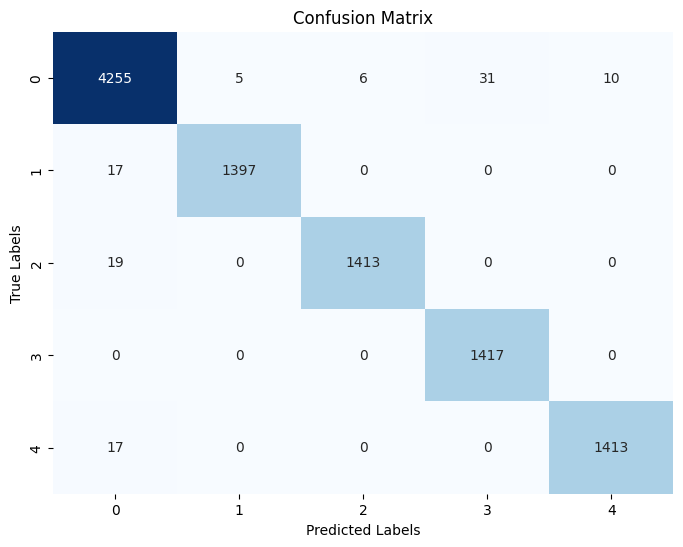

In [ ]:
y_pred = np.argmax(model.predict(X_val), axis=1)

conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Loss: 0.0285
Validation Accuracy: 0.9895
